In [1]:
#import library
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import classification_report
tf.get_logger().setLevel('ERROR')

In [2]:
#load data
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
y = tf.keras.utils.to_categorical(y, num_classes=2)
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [3]:
#build model
model = Sequential()
model.add(Dense(30, input_shape=(X.shape[1],), activation='relu'))  # 30 neurons
model.add(Dense(15, activation='relu'))
model.add(Dense(2, activation='softmax'))  # 2 output classes

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
#test model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_split=0.2,
    verbose=0
)

In [5]:
#performence
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {accuracy:.2f}")


Test Accuracy: 0.93


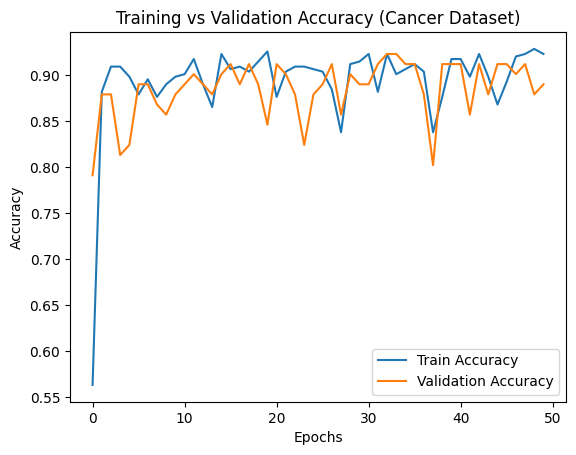

In [6]:
#accuracy graph
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Training vs Validation Accuracy (Cancer Dataset)")
plt.show()